In [1]:
import json
def get_acc_list(file_path: str, users: int) -> list:
    acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    acc_lines = lines[-users:]
    print(acc_lines)
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            acc_list.append(acc_data['Results_raw']['test_acc'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    acc_list = [round(float(acc), 4) for acc in acc_list]
    return acc_list

In [2]:
def get_avg_acc_list(file_path: str, rounds) -> float:
    avg_acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    acc_lines = lines[:rounds]
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            avg_acc_list.append(acc_data['Results_weighted_avg']['test_acc'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    avg_acc_list = [round(float(acc), 4) for acc in avg_acc_list]
    return avg_acc_list


In [3]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每轮平均准确率，帮我在一张图上使用matplotlib绘制每个实验的平均准确率曲线
import matplotlib.pyplot as plt
def plot_avg_accuracy(exp_datas: dict):
    plt.figure(figsize=(12, 6))

    for exp_name, acc_list in exp_datas.items():
        plt.plot(acc_list, label=exp_name)

    plt.title('Average Accuracy Over Rounds')
    plt.xlabel('Rounds')
    plt.ylabel('Average Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


In [4]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每个用户的准确率，帮我在一张图上使用matplotlib绘制每个实验的用户准确率分布的箱线图
def plot_user_accuracy(exp_datas: dict):
    plt.figure(figsize=(12, 6))

    # 准备数据
    data = [exp_datas[exp_name] for exp_name in exp_datas.keys()]
    labels = list(exp_datas.keys())

    # 绘制箱线图
    plt.boxplot(data, labels=labels)

    plt.title('User Accuracy Distribution')
    plt.xlabel('Experiments')
    plt.ylabel('User Accuracy')
    plt.grid()
    plt.show()


In [5]:
# USERS = 40
# ROUNDS = 500
# exp_paths = {
#     "ditto": "exp/ditto_pacs_resnet10_on_pacs_lr0.01_lstep1", 
#     "fedavg": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fedprox": "exp/fedprox_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fedbn": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250815040230",
#     "local": "exp/local_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "mix": "exp/mix_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fdse": "exp/fdse_fdse_resnet10_on_pacs_lr0.01_lstep1",
#     "pfedme": "exp/PFedMe_pacs_resnet10_on_pacs_lr0.01_lstep1"
# }
# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)

Processing experiment: ditto at exp/ditto_office_caltech_alexnet_on_office_caltech_lr0.05_lstep1
["{'Role': 'Client #1', 'Round': 500, 'Results_raw': {'test_avg_loss': 2.3178353309631348, 'test_loss': 122.84527254104614, 'test_correct': 34.0, 'test_acc': 0.6415094339622641, 'test_total': 53}}\n", "{'Role': 'Client #2', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.6342049837112427, 'test_loss': 57.197174429893494, 'test_correct': 25.0, 'test_acc': 0.7142857142857143, 'test_total': 35}}\n", "{'Role': 'Client #3', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.7989692667783317, 'test_loss': 212.27837347984314, 'test_correct': 80.0, 'test_acc': 0.6779661016949152, 'test_total': 118}}\n", "{'Role': 'Client #4', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.3712536096572876, 'test_loss': 80.90396296977997, 'test_correct': 45.0, 'test_acc': 0.7627118644067796, 'test_total': 59}}\n", "{'Role': 'Client #5', 'Round': 500, 'Results_raw': {'test_avg_loss': 1.8882017739407428, 'test_loss':

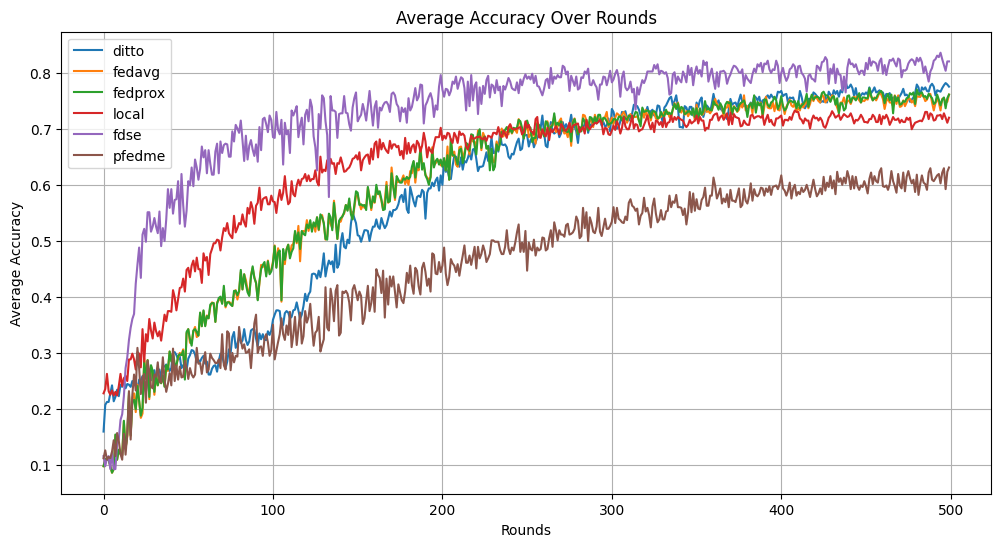

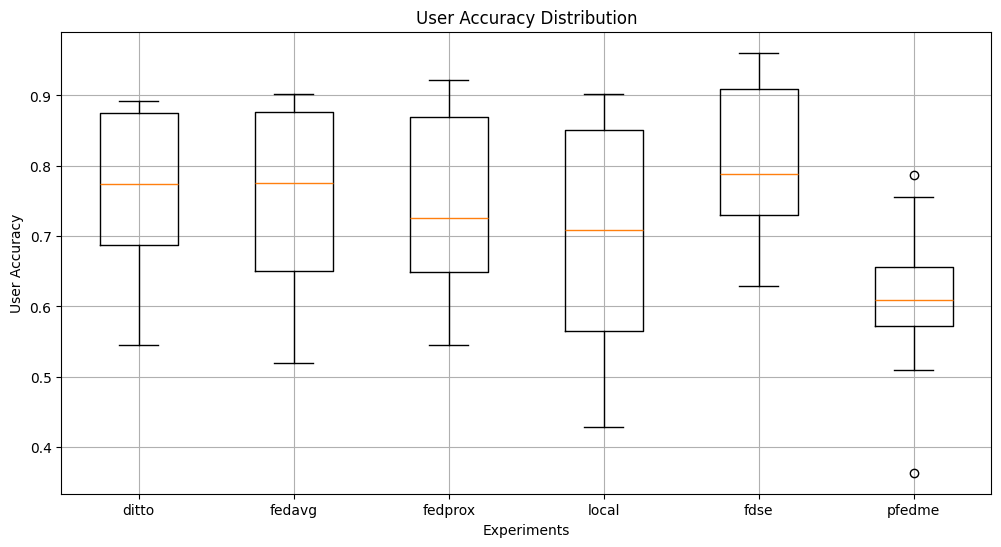

In [6]:
USERS = 10
ROUNDS = 500
exp_paths = {
    "ditto": "exp/ditto_office_caltech_alexnet_on_office_caltech_lr0.05_lstep1", 
    "fedavg": "exp/fedavg_office_caltech_alexnet_on_office_caltech_lr0.05_lstep1/sub_exp_20250824175842",
    "fedprox": "exp/fedprox_office_caltech_alexnet_on_office_caltech_lr0.05_lstep1",
    "local": "exp/local_office_caltech_alexnet_on_office_caltech_lr0.05_lstep1",
    "fdse": "exp/fdse_fdse_alexnet_on_office_caltech_lr0.05_lstep1",
    "pfedme": "exp/PFedMe_office_caltech_alexnet_on_office_caltech_lr0.05_lstep1"
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)